## Exercise
### Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv('./Datasets/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


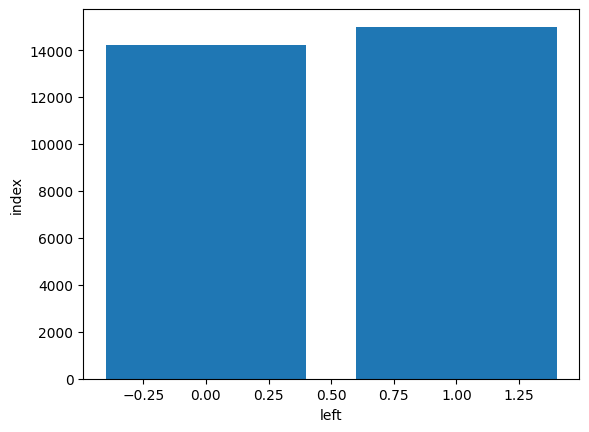

In [4]:
plt.bar(df['left'],df.index)
plt.xlabel('left')
plt.ylabel('index')
plt.show()

In [5]:
left = df[df.left==1]
left.shape

(3571, 10)

In [6]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [7]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()
numeric_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

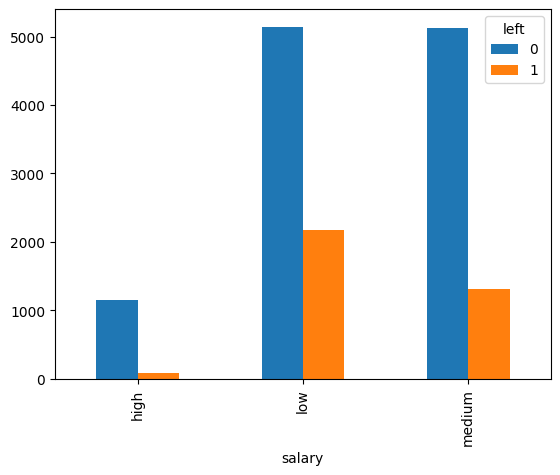

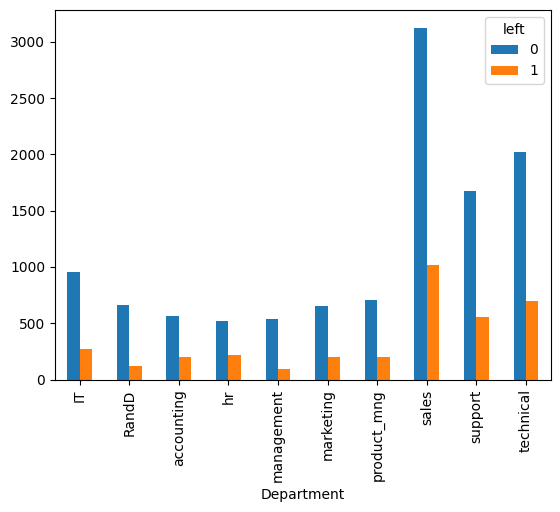

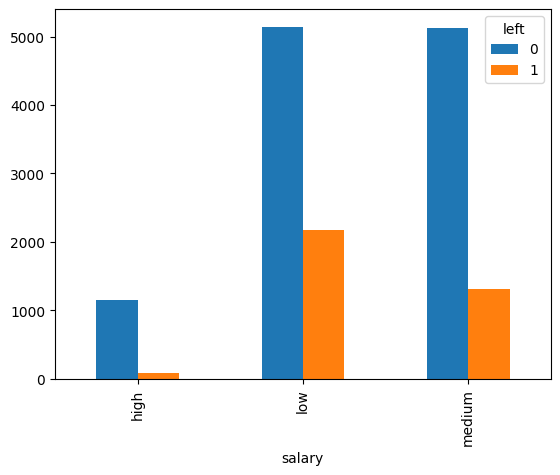

In [10]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
pd.crosstab(df.Department,df.left).plot(kind='bar')
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [11]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [13]:
from sklearn.preprocessing import LabelEncoder
le_salary = LabelEncoder()
subdf['salary'] = le_salary.fit_transform(subdf['salary'])
subdf.head()

C:\Users\mkkar\AppData\Local\Temp\ipykernel_17616\884103199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['salary'] = le_salary.fit_transform(subdf['salary'])


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [15]:
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1
...,...,...,...,...
14994,0.40,151,0,1
14995,0.37,160,0,1
14996,0.37,143,0,1
14997,0.11,280,0,1


In [17]:
Left=df['left'].values
Left

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
ct=ColumnTransformer([('Salary',OneHotEncoder(),[3])],remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('Salary', OneHotEncoder(), [3])])

In [22]:
X=ct.fit_transform(subdf)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

In [25]:
Xe=X[:,1:]
Xe

array([[1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

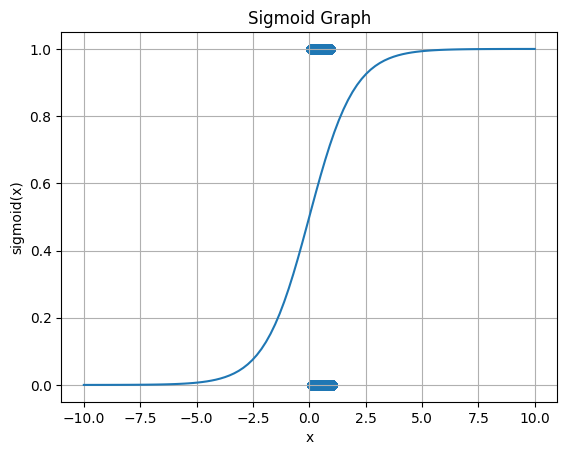

In [29]:
import numpy as np

plt.scatter(df['satisfaction_level'],df['left'])
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Graph')
plt.grid(True)
plt.show()

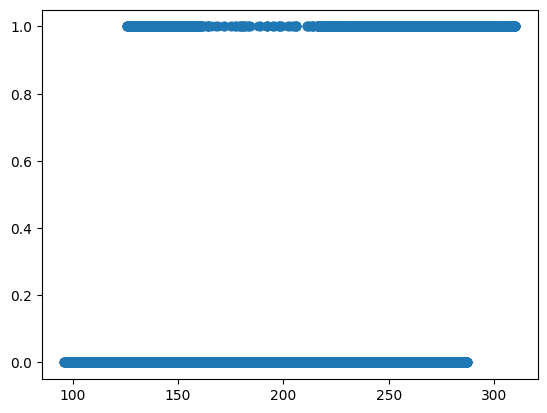

In [30]:
plt.scatter(df['average_montly_hours'],df['left'])

In [31]:
import seaborn as sns

In [35]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: >

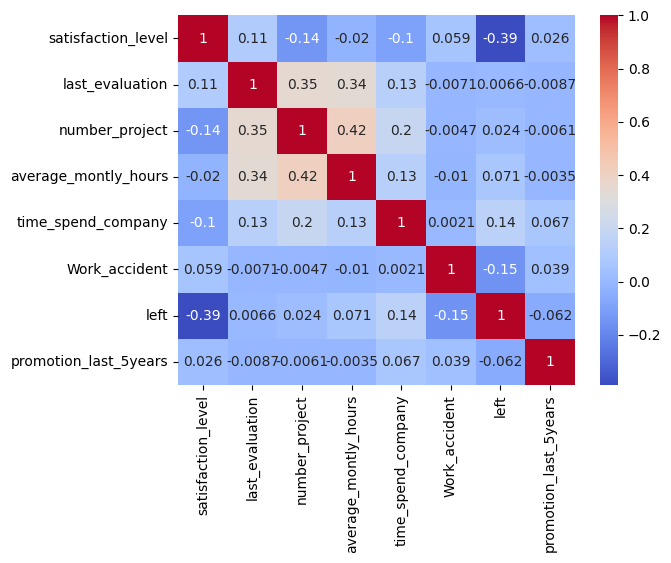

In [36]:
df_corr=df.drop(columns=['Department','salary']).corr()
sns.heatmap(df_corr,annot=True,cmap='coolwarm')

In [39]:
cf=LogisticRegression()

In [47]:
x_train,x_test,y_train,y_test=train_test_split(Xe,Left,test_size=0.2,random_state=0)

In [48]:
cf.fit(x_train,y_train)

LogisticRegression()

Xe -> SalaryEncode0,SalaryEncode1,satisfaction_level, average_montly_hours,promotion_last_5years	
Y -> left

In [52]:
a=cf.predict(x_test)
b=cf.predict_proba(x_test)
b

array([[0.73767102, 0.26232898],
       [0.78755637, 0.21244363],
       [0.870678  , 0.129322  ],
       ...,
       [0.68155948, 0.31844052],
       [0.68904024, 0.31095976],
       [0.43396651, 0.56603349]])

In [54]:
score=cf.score(x_test,y_test)
score

0.777

In [56]:
from sklearn.model_selection import cross_validate

In [58]:
k=cross_validate(cf,Xe,Left,cv=5)
k

{'fit_time': array([0.21150374, 0.1282208 , 0.09868026, 0.10956597, 0.15668893]),
 'score_time': array([0.00240612, 0.002285  , 0.00168586, 0.00164771, 0.00244546]),
 'test_score': array([0.766     , 0.78566667, 0.78266667, 0.76766667, 0.78026009])}